## 1.Load Task in Benchmark Quickly

Tutorial one is to load a task/env conveniently by simply giving task name and desired target embodiment (default is Franka).

In [ ]:
import os
os.environ["MUJOCO_GL"] = "egl"  # If run this tutorial on server instead of PC, run in headless mode.
from PIL import Image
from dm_control import viewer
from VLABench.envs import load_env
from VLABench.robots import *
from VLABench.tasks import *

/home/hbuurmei/Documents/VLABench/.venv/lib/python3.11/site-packages/glfw/__init__.py:917: GLFWError: (65550) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
/home/hbuurmei/Documents/VLABench/.venv/lib/python3.11/site-packages/dash/_jupyter.py:30: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  _dash_comm = Comm(target_name="dash")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Set the embodiment and task 

In [2]:
task = "select_fruit"
robot = "franka"

###  1.1Load task and build environment

Each time you load the single env, each instance varies in a large range.

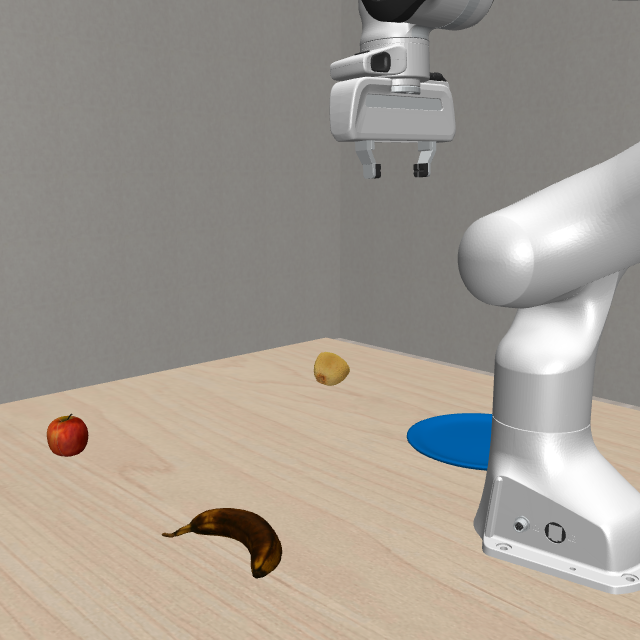

In [ ]:
env = load_env(task, robot=robot, time_limit=1000)
env.reset()

image = env.render(camera_id=2, width=640, height=640)
Image.fromarray(image)

In [5]:
obs=env.get_observation()
obs

{'q_state': array([ 2.95987781e-06, -1.04758420e+00,  3.17353756e-03, -2.63995536e+00,
        -4.40926257e-03,  1.53563645e+00, -2.31999842e+00]),
 'q_velocity': array([ 3.00549191e-06, -2.04173632e-03,  9.75554478e-04, -2.38824520e-02,
        -1.29761598e-03, -4.19126729e-03,  2.02324655e-06]),
 'q_acceleration': array([ 1.27930789e-03,  6.75749215e-02, -1.12792787e-02,  3.56739839e-01,
         1.54173039e-02,  1.85087997e-02, -3.55609045e-04]),
 'rgb': array([[[[ 90,  90,  89],
          [ 90,  89,  88],
          [ 76,  76,  76],
          ...,
          [142, 140, 136],
          [142, 139, 135],
          [142, 139, 135]],
 
         [[134, 132, 128],
          [133, 130, 127],
          [132, 129, 125],
          ...,
          [141, 139, 134],
          [141, 138, 133],
          [142, 139, 135]],
 
         [[132, 130, 126],
          [132, 129, 126],
          [132, 129, 125],
          ...,
          [141, 138, 134],
          [142, 140, 135],
          [142, 140, 136]],
 

In [6]:
obs.keys()

dict_keys(['q_state', 'q_velocity', 'q_acceleration', 'rgb', 'depth', 'segmentation', 'robot_mask', 'instrinsic', 'extrinsic', 'masked_point_cloud', 'point_cloud', 'ee_state', 'grasped_obj_name'])

### 1.2Run in interactive viewer

In [8]:
viewer.launch(env)

RuntimeError: <function DoubleBufferedGlfwContext._platform_init at 0x7fa870bfd300> may only be called if using GLFW for offscreen rendering, got `render.BACKEND='egl'`.

## 2.Overview of Primitive Tasks

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

def plot_images(images, instructions, titles, max_columns=5, max_text_width=30):
    assert len(images) == len(instructions) == len(titles), "images should have the same length as instructions and titles"
    num_images = len(images)
    num_rows = (num_images + max_columns - 1) // max_columns
    fig, axes = plt.subplots(num_rows, max_columns, figsize=(max_columns * 3, num_rows * 3))
    axes = axes.flatten()
    for i, (image, instruction, title) in enumerate(zip(images, instructions, titles)):
        if np.max(image) <= 1:
            image = (image * 255).astype(np.uint8)
        ax = axes[i]
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(title, fontsize=14)
        wrapped_instruction = textwrap.fill(instruction, width=max_text_width)
        ax.text(0.5, -0.1, wrapped_instruction, ha='center', va='top', transform=ax.transAxes, fontsize=12)
        
    for i in range(num_images, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

In [10]:
def load_env_and_render(task, robot, **kwargs):
    env = load_env(task, robot=robot, **kwargs)
    env.reset()

    image = env.render(camera_id=2, width=480, height=480)
    instruction = env.task.get_instruction()
    return image, instruction

### 2.1 Basic Scene: Mesh&Texture 

Default Setting: no additional domain randomization, no texture and scene augmenation

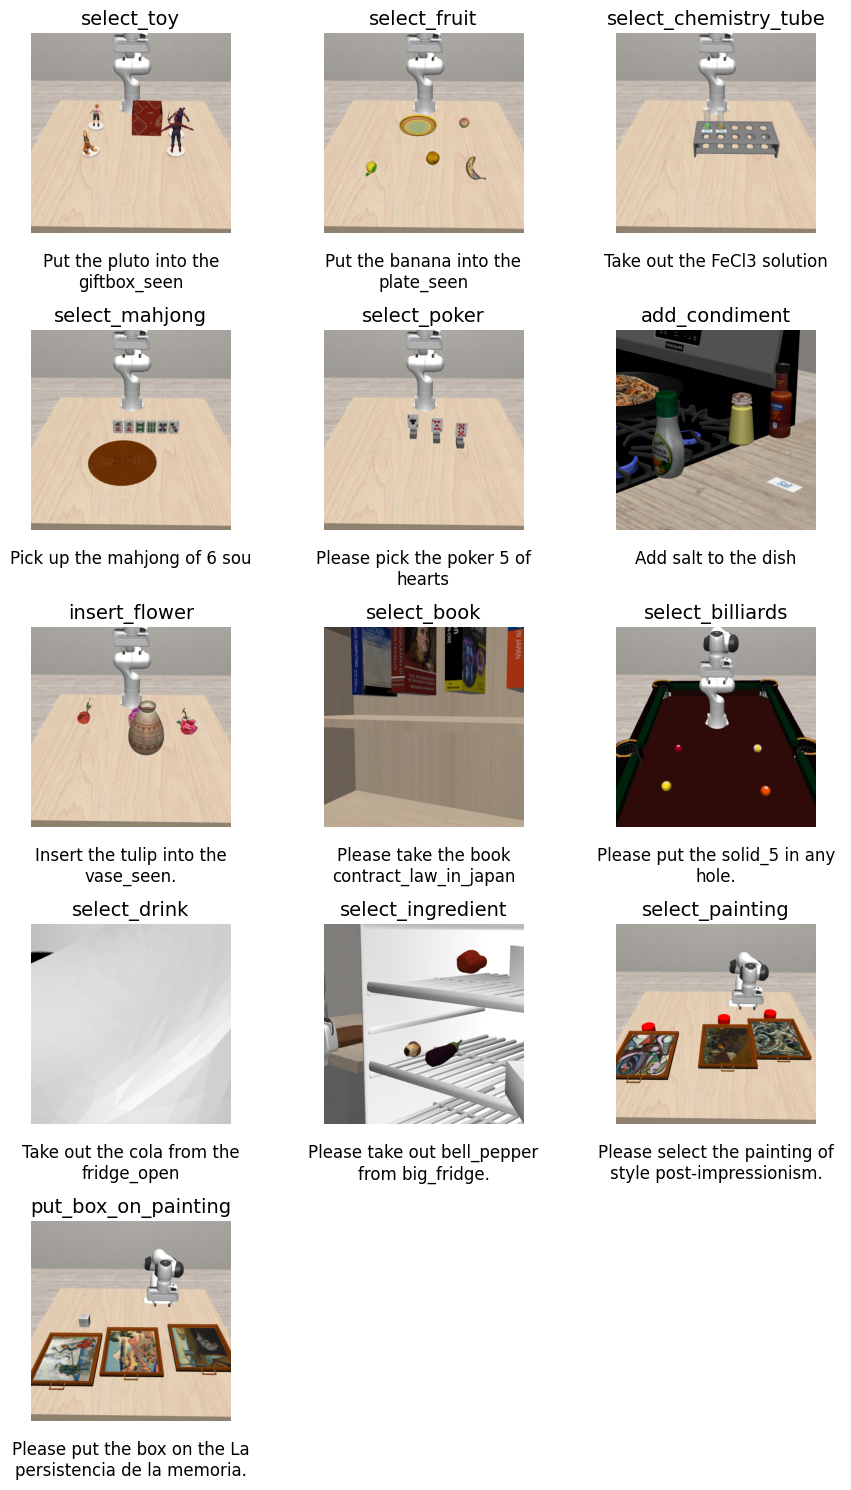

In [11]:
tasks_to_load = ["select_toy", "select_fruit", "select_chemistry_tube", "select_mahjong", "select_poker", "add_condiment", "insert_flower", "select_book", "select_billiards", "select_drink", "select_ingredient", "select_painting", "put_box_on_painting"]
images, instructions = [], []
for task in tasks_to_load:
    try:
        image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
        images.append(image)
        instructions.append(instruction)
    except Exception as e:
        import traceback
        traceback.print_exc()
        print(f"Failed to load task {task}: {e}")
plot_images(images, instructions, titles=tasks_to_load, max_columns=3)

### 2.2 Common Sense & World Knowledge

The base environment for Common Sense & World Knowledge type tasks quering LLM to generate task instructions by default. We also recommend to generate the instructions in batch later.

In [12]:
tasks_to_load = ["hammer_loose_nail"]

### 2.3 Spatial Understanding

The base environment for spatial understanding generate the relative spatial relationships between target entity and other entities by task-specific rules.

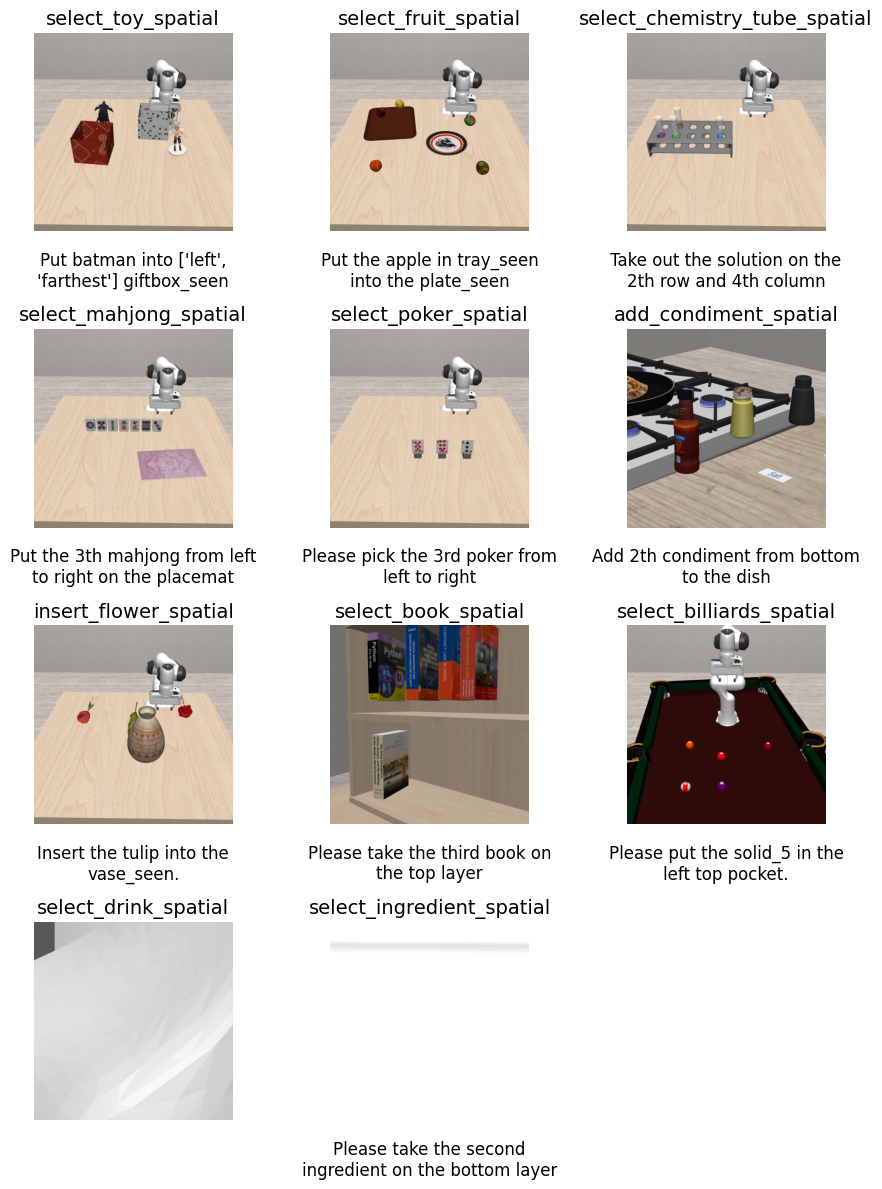

In [ ]:
tasks_to_load = ["select_toy_spatial", "select_fruit_spatial", "select_chemistry_tube_spatial", "select_mahjong_spatial", "select_poker_spatial", "add_condiment_spatial", "insert_flower_spatial", "select_book_spatial", "select_billiards_spatial", "select_drink_spatial", "select_ingredient_spatial"]
# "", "select_poker", "add_condiment", "insert_flower", "select_book", "select_billiards", "select_drink", "select_ingredient", "select_painting", "put_box_on_painting"
images, instructions = [], []
for task in tasks_to_load:
    try:
        image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
        images.append(image)
        instructions.append(instruction)
    except Exception as e:
        import traceback
        traceback.print_exc()
        print(f"Failed to load task {task}: {e}")
plot_images(images, instructions, titles=tasks_to_load, max_columns=3)

### 2.4 Semantic Understanding

In [ ]:
tasks_to_load = ["select_toy_semantic", "select_fruit_semantic"]
for task in tasks_to_load:
    try:
        image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
        images.append(image)
        instructions.append(instruction)
    except Exception as e:
        import traceback
        traceback.print_exc()
        print(f"Failed to load task {task}: {e}")

In [15]:
instructions

["Put batman into ['left', 'farthest'] giftbox_seen",
 'Put the apple in tray_seen into the plate_seen',
 'Take out the solution on the 2th row and 4th column',
 'Put the 3th mahjong from left to right on the placemat',
 'Please pick the 3rd poker from left to right',
 'Add 2th condiment from bottom to the dish',
 'Insert the tulip into the vase_seen.',
 'Please take the third book on the top layer',
 'Please put the solid_5 in the left top pocket.',
 '',
 'Please take the second ingredient on the bottom layer',
 "It's a conversation",
 "tell some specifics of apple between ['apple', 'kiwi', 'mango', 'peach']"]

## 3.Overview of Composite Tasks

### 3.1 Cluster series tasks

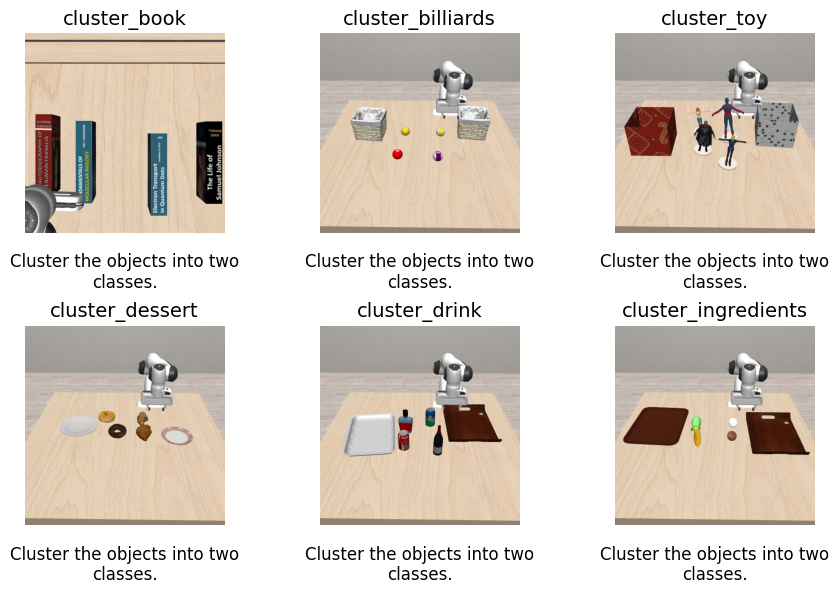

In [16]:
tasks_to_load = ["cluster_book", "cluster_billiards", "cluster_toy", "cluster_dessert", "cluster_drink", "cluster_ingredients"]
images, instructions = [], []
for task in tasks_to_load:
    image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
    images.append(image)
    instructions.append(instruction)
plot_images(images, instructions, titles=tasks_to_load, max_columns=3)

### 3.2 Other Composite Tasks 

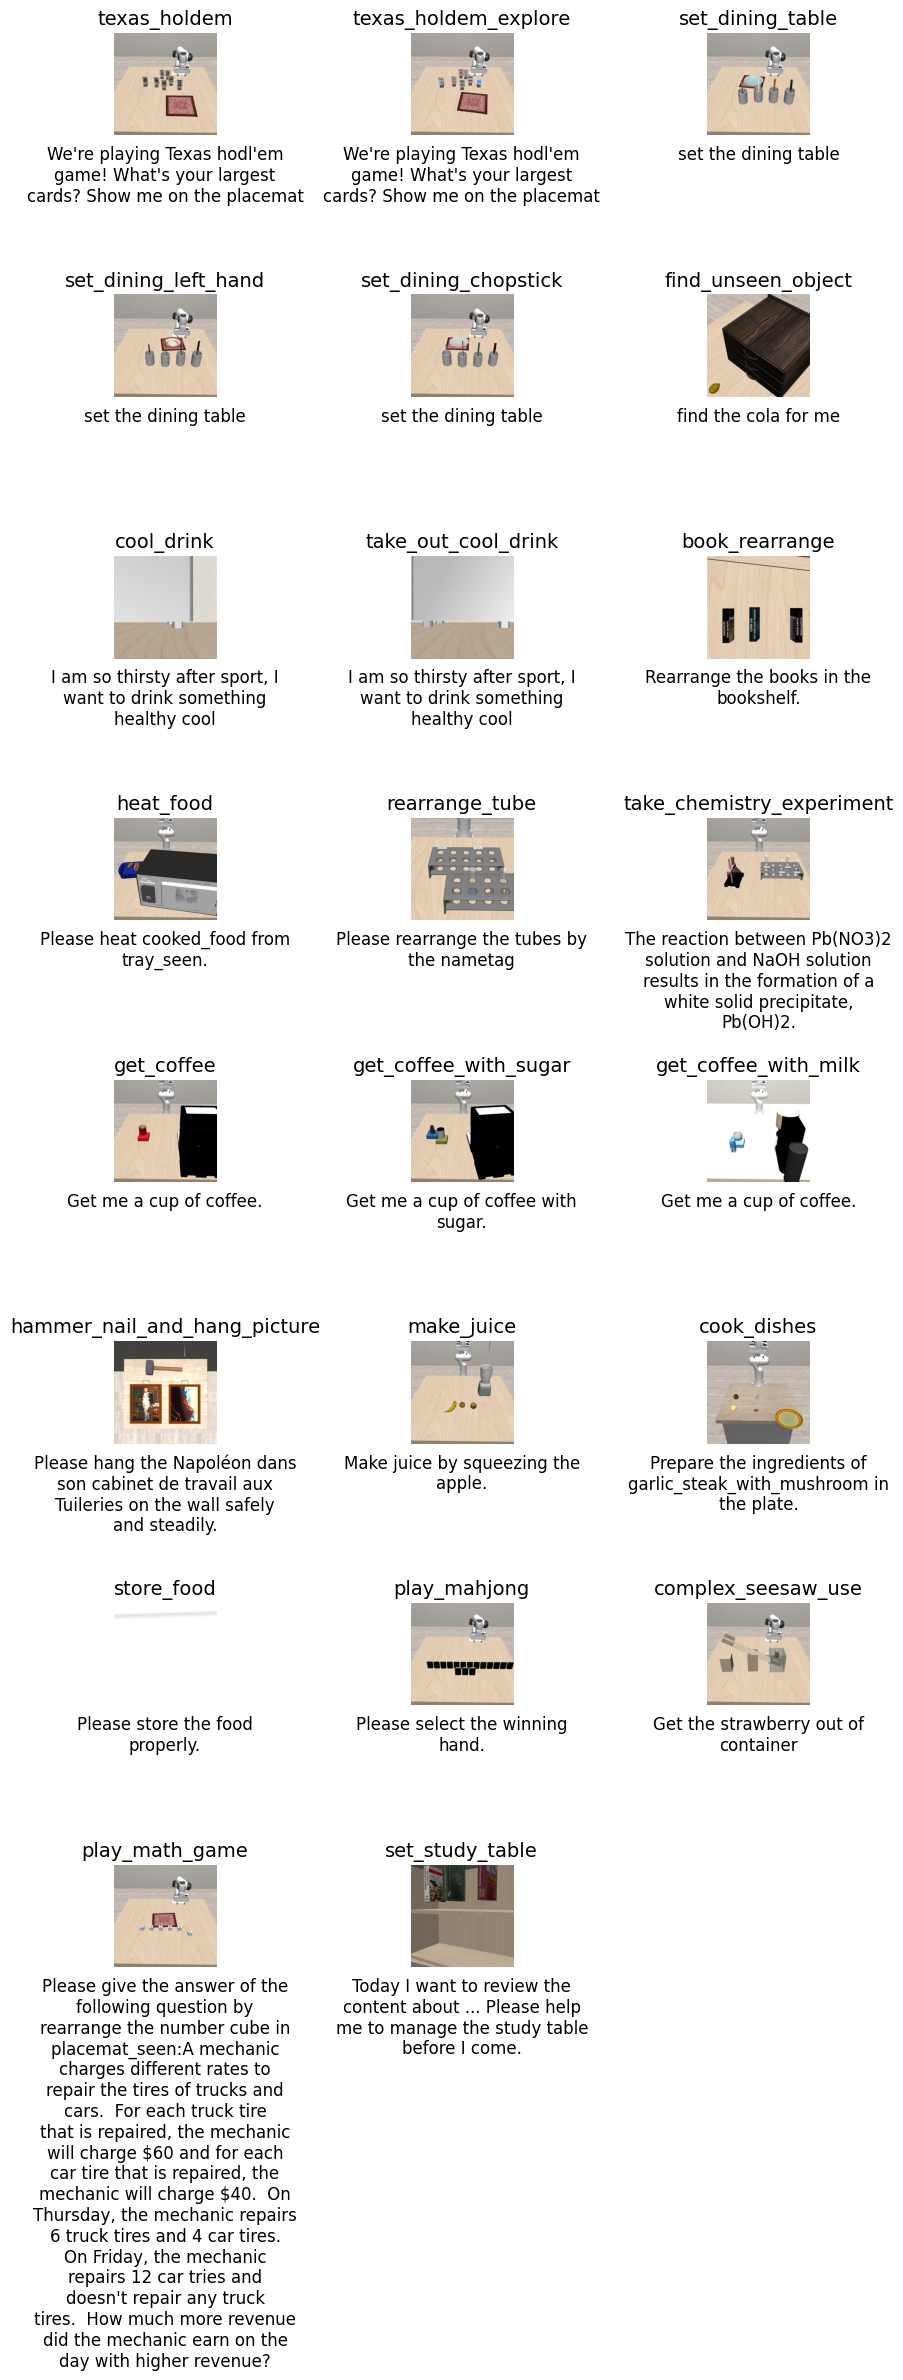

In [17]:
tasks_to_load = ["texas_holdem", "texas_holdem_explore", "set_dining_table", "set_dining_left_hand", "set_dining_chopstick", "find_unseen_object", "cool_drink", "take_out_cool_drink", "book_rearrange", "heat_food", "rearrange_tube", "take_chemistry_experiment", "get_coffee", "get_coffee_with_sugar", "get_coffee_with_milk", "hammer_nail_and_hang_picture", "make_juice", "cook_dishes", "store_food", "play_mahjong", "complex_seesaw_use", "play_math_game", "set_study_table"]
images, instructions = [], []
for task in tasks_to_load:
    image, instruction = load_env_and_render(task, robot, reset_wait_step=0)
    images.append(image)
    instructions.append(instruction)
plot_images(images, instructions, titles=tasks_to_load, max_columns=3)